<a href="https://colab.research.google.com/github/ahnjj/Data-Analysis-Project/blob/master/wine-quality/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Github 레포 연결

In [2]:
!git clone https://github.com/ahnjj/Data-Analysis-Project.git  # 레포 클론

Cloning into 'Data-Analysis-Project'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 33 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 151.11 KiB | 773.00 KiB/s, done.
Resolving deltas: 100% (3/3), done.


In [25]:
%cd /content/Data-Analysis-Project/wine-quality/

/content/Data-Analysis-Project/wine-quality


In [26]:
pwd

'/content/Data-Analysis-Project/wine-quality'

In [27]:
!ls

data  README.md  Wine_Quality.ipynb


# 2. 데이터 준비

In [5]:
import pandas as pd

In [28]:
train = pd.read_csv('./data/train.csv')
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [29]:
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')
submission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [ ]:
# submission csv로 저장하기
# submission.to_csv('submission.csv', index=False)

### 데이터 컬럼 살펴보기
* index
* quality : 와인 품질
* fixed acidity : 와인 산도
* volatile acidity : 와인 휘발성 산도
* critic acid : 와인 시트르산
* residual sugar : 와인 잔당
* chlorides : 와인 염화물
* free sulfur dioxide : 와인 SO2
* total sulfur dioxide : 와인의 총 SO2
* density : 와인 밀도
* pH : 와인 pH
* sulphates : 와인 SO4
* alcohol : 와인 알콜 도수
* type : 와인 타입



In [30]:
train.info()
# null은 없는 것으로 보임
# object형 변수1개, 나머지는 다 수치형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [31]:
# 수치형 데이터 통계
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [32]:
# 범주형 데이터 통계
train.describe(include='object')

,type
count,5497
unique,2
top,white
freq,4159


## 데이터 전처리
### Feature Engineering
* 문자형 변수 type -> 수치형 변수
  * 방법이 여러가지 있는데, 여기서는 문자형 변수를 제거(무시)하는 방법 채택

In [33]:
# train data
train = train.drop(['index','type'],axis=1)
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9


In [34]:
# test data
test = test.drop(['index','type'], axis=1)
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8


### 종속, 독립변수 설정

In [35]:
# 종속변수 설정 y
# target값 : quality
y = train['quality']
y.head()

,quality
0,5
1,5
2,5
3,6
4,6


In [36]:
# 독립변수 설정 X
X = train.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9


# 모델링
### 모델링 순서


1.   모델 로드
    - 분류(category) 의 경우 LogisticRegression을 많이 쓴다.(비연속적인 데이터)
    - 특히 binary classification의 경우!
    -
2.   train data로 모델 학습
3.   test data로 예측




In [37]:
from sklearn.linear_model import LogisticRegression
# 1. 모델 로드
# sklearn 라이브러리 사용!
model = LogisticRegression()

In [38]:
# 2. 모델 학습
# sklearn의 경우 모델학습시 fit()함수 사용
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# 3. 예측
# sklearn의 경우 predict()를 사용
predict = model.predict(test) # ndarray
print(predict[:5])

[6 5 5 5 6]


In [43]:
# 예측 결과 저장
submission['quality'] = predict
submission.head()

,index,quality
0,0,6
1,1,5
2,2,5
3,3,5
4,4,6


### categorical data처리2 : 무시하지 않고 수치형으로 변환

In [50]:
# 다시 데이터 로드
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [51]:
train['type']=train['type'].apply(lambda x: 0 if x=='white' else 1)
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [57]:
# test data도
test['type']=test['type'].apply(lambda x:0 if x=='white' else 1)
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,1
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,0
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,1
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,1


### MinMaxScaler 로 데이터 정규화
- 0~1 사이 값으로

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # 1. 정규화 객체 로드
scaler.fit(train[train.columns[2:-1]])  # 2. 2번째 ~마지막 컬럼까지 정규화 객체에 값 설정
train[train.columns[2:-1]] = scaler.transform(train[train.columns[2:-1]]) # 3. 설정한 값으로 데이터 정규화
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,0
1,1,5,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,1
2,2,5,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,0
3,3,6,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,0
4,4,6,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,0.322314,0.046667,0.174699,0.010736,0.033278,0.031250,0.133641,0.117409,0.480315,0.095506,0.304348,0
5493,5493,6,0.206612,0.066667,0.216867,0.009202,0.041597,0.086806,0.241935,0.069983,0.330709,0.162921,0.434783,0
5494,5494,7,0.330579,0.046667,0.204819,0.007669,0.043261,0.104167,0.200461,0.074224,0.259843,0.280899,0.478261,0
5495,5495,5,0.231405,0.220000,0.186747,0.015337,0.054908,0.059028,0.218894,0.093310,0.307087,0.106742,0.362319,0


In [59]:
# test 데이터에도 똑같이 적용 : test 데이터는 target 컬럼이 없으니까 1~-1
test[test.columns[1:-1]] = scaler.transform(test[test.columns[1:-1]])
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,0.429752,0.153333,0.289157,0.092025,0.056572,0.034722,0.154378,0.128976,0.125984,0.089888,0.521739,0
1,1,0.785124,0.233333,0.349398,0.019939,0.101498,0.048611,0.078341,0.256217,0.251969,0.151685,0.144928,1
2,2,0.223140,0.133333,0.162651,0.070552,0.051581,0.149306,0.398618,0.148255,0.354331,0.264045,0.202899,0
3,3,0.280992,0.046667,0.234940,0.018405,0.056572,0.069444,0.352535,0.148255,0.614173,0.140449,0.289855,0
4,4,0.247934,0.120000,0.156627,0.021472,0.016639,0.078125,0.152074,0.063621,0.330709,0.140449,0.550725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.272727,0.340000,0.012048,0.026074,0.121464,0.079861,0.202765,0.199152,0.637795,0.174157,0.246377,1
996,996,0.404959,0.046667,0.180723,0.015337,0.061564,0.097222,0.285714,0.136688,0.377953,0.089888,0.260870,0
997,997,0.413223,0.386667,0.156627,0.016871,0.108153,0.010417,0.039171,0.192597,0.322835,0.292135,0.173913,1
998,998,0.264463,0.226667,0.114458,0.026074,0.103161,0.059028,0.069124,0.147484,0.511811,0.191011,0.420290,1


### 종속, 독립변수 설정

In [68]:
# X = train[2:] # 이렇게하면 2번째 행부터 됨...
X = train[train.columns[2:]]  # 이렇게 열 지정하거나 features = train.columns[2:]  / X = train[features]로 설정
y = train['quality']
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,1
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,0
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,0
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,0


## 모델 학습

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=180)
model.fit(X,y)
predict = model.predict(test[test.columns[1:]])
predict[:5]

array([6, 5, 5, 6, 6])

In [73]:
submission['quality'] = predict
submission.head()

,index,quality
0,0,6
1,1,5
2,2,5
3,3,6
4,4,6


# target 변수 EDA


In [76]:
# 1. target변수 값 빈도 확인
train['quality'].value_counts()

,count
quality,
6,2416
5,1788
7,924
4,186
8,152
3,26
9,5


In [77]:
## 시각화하기
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드
fe = fm.FontEntry(fname = 'NotoSansKR-Regular.otf', name = 'NotoSansKR')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='NotoSansKR')

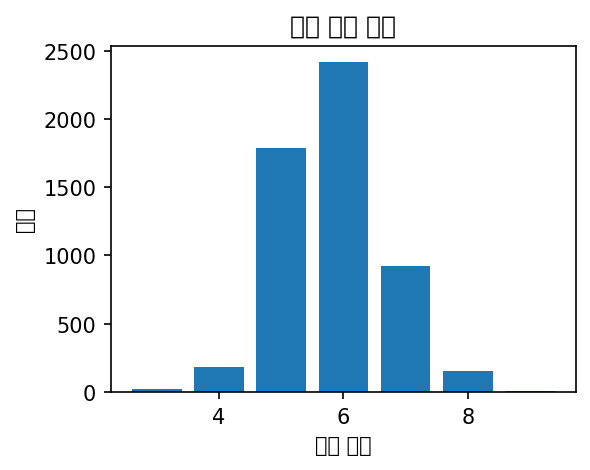

In [79]:
# 시각화
x = train['quality'].value_counts().index
y = train['quality'].value_counts().values

plt.figure(figsize=(4,3), dpi=150)

plt.title('와인 품질 분포')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

## RandomForest 모델 사용하기

In [93]:
# train, validation 데이터 나누기
from sklearn.model_selection import train_test_split

features = train.columns[2:]

X = train[features]
y = train['quality']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=True)

In [94]:
# randomforest 모델 사용
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42) # n_estimators : 사용할 결정트리 개수
model.fit(X_train, y_train)
predict = model.predict(X_val)
predict

array([5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 5, 7, 7, 6, 6, 5, 7, 5, 6, 5, 7, 7,
       5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 6, 6, 6, 4, 6, 6, 6, 6, 5, 5, 6, 8, 6, 5, 7, 6, 6, 6,
       5, 6, 5, 6, 6, 6, 7, 5, 7, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5,
       5, 6, 6, 5, 5, 6, 7, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6, 7, 6,
       5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 8, 5, 6, 7, 6, 5, 6, 6, 6,
       6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 7, 6, 5, 7, 5, 7, 5, 6,
       5, 5, 6, 6, 6, 7, 6, 8, 6, 6, 5, 5, 5, 7, 7, 5, 6, 6, 6, 7, 5, 6,
       5, 6, 6, 6, 5, 5, 7, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 7, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 4, 5, 6, 5, 5, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       7, 5, 7, 7, 6, 5, 6, 6, 7, 5, 5, 6, 6, 7, 5,

# 평가
### 1. 정확도
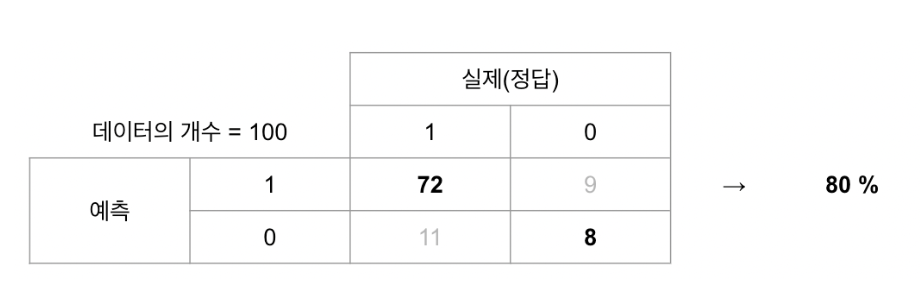

In [95]:
import numpy as np

def accuracy(y_true, y_pred):
    score = np.mean(y_true == y_pred)
    return score

acc = accuracy(y_val ,predict)
print(f"{acc*100:.2f}%")

65.82%


# 결과 시각화

In [96]:
import numpy as np

##### 모델 검증 시각화 #####
def make_plot(y_true, pred):

    acc = accuracy(y_true, pred)
    df_validation = pd.DataFrame({'y_true':y_true, 'y_pred':pred})

    # 검증 데이터 정답지('y_true') 빈도수 (sorted)
    df_validation_count = pd.DataFrame(df_validation['y_true'].value_counts().sort_index())
    # 검증 데이터 예측치('y_pred') 빈도수 (sorted)
    df_pred_count =  pd.DataFrame(df_validation['y_pred'].value_counts().sort_index())

    # pd.concat - 검증 데이타 정답지, 예측치 빈도수 합치기
    df_val_pred_count = pd.concat([df_validation_count,df_pred_count], axis=1).fillna(0)

    ############################################################
    # 그래프 그리기
    ############################################################

    x = df_validation_count.index
    y_true_count = df_val_pred_count['y_true']
    y_pred_count = df_val_pred_count['y_pred']

    width = 0.35
    plt.figure(figsize=(5,3),dpi=150)

    plt.title('ACC : ' + str(acc)[:6])
    plt.xlabel('quality')
    plt.ylabel('count')

    p1 = plt.bar([idx-width/2 for idx in x], y_true_count, width, label='real')
    p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

    plt.legend()
    plt.show()

make_plot(y_val, predict)

KeyError: 'y_true'

# validation말고 실제 데이터에 예측 실행

In [91]:
# 실제 데이터에 실행
features = train.columns[2:]
X = train[features]
y = train['quality']

model.fit(X_train, y_train)
predict = model.predict(test[features])

# 결과 저장
submission['quailty'] = predict

# Target 값에 따른 feature 통계값 시각화

# 변수간 상관관계 시각화

# 와인 종류별(type) 데이터 개수

# RandomForest + K-Fold

# 앙상블 기법
- 종류 : 보팅, 배깅, 스태킹, 부스팅
- 보팅 : 하드보팅 / 소프트 보팅

1. 하드보팅 사용
- 여러 모델이 예측한 결과 중 투표를 가장 많이 받은 클래스로 선정
- 앞에서 K-Fold로 얻어낸 5개 모델 넣고